In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df_male = df[df['Gender'].str.lower() == 'male'].reset_index(drop=True)
df_female = df[df['Gender'].str.lower() == 'female'].reset_index(drop=True)

In [4]:
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

In [7]:
import pandas as pd

# Assuming df has a column 'NObeyesdad'
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# Map categories to broader groups
mapping = {
    'Insufficient_Weight': 'Insufficient_Weight',
    'Normal_Weight': 'Normal_Weight',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obese',
    'Obesity_Type_II': 'Obese',
    'Obesity_Type_III': 'Obese'
}

# Create a new column
df['Obesity_Group'] = df['WeightCategory'].map(mapping)

# Check results
# print(df[['WeightCategory', 'Obesity_Group']].head())
print(df['Obesity_Group'].value_counts())


Obesity_Group
Obese                  7593
Overweight             3725
Normal_Weight          2345
Insufficient_Weight    1870
Name: count, dtype: int64


In [10]:
order_grouped = ['Insufficient_Weight', 'Normal_Weight', 'Overweight', 'Obese']

In [8]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

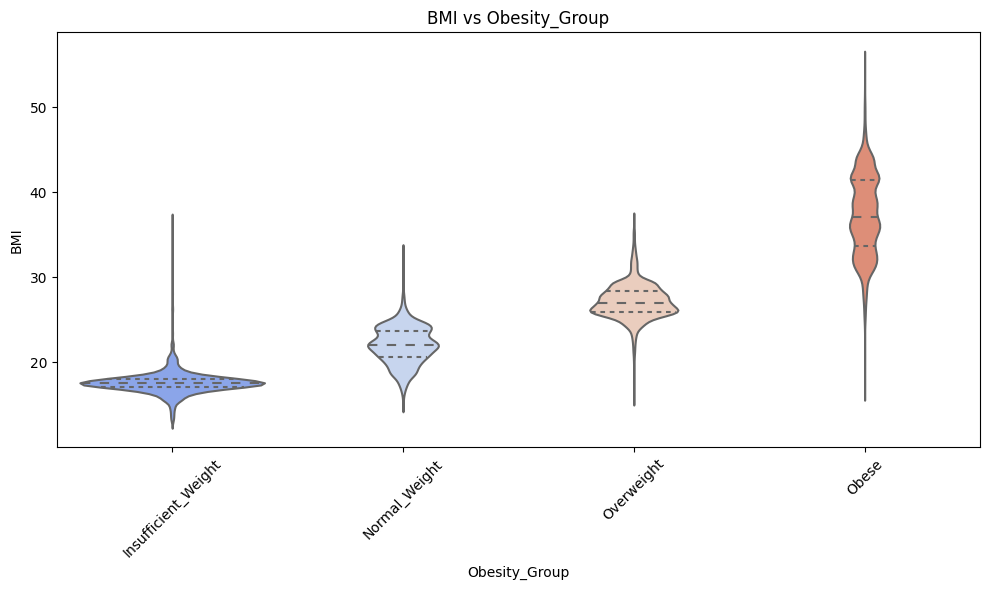

In [11]:
plt.figure(figsize=(10,6))
sns.violinplot(
    x='Obesity_Group',
    y='BMI',
    data=df,
    order=order_grouped,
    inner='quartile',
    palette='coolwarm'
)
plt.title('BMI vs Obesity_Group')
plt.xlabel('Obesity_Group')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Assuming df already has BMI and Obesity_Group columns
X = df[['BMI']]  # using only BMI
y = df['Obesity_Group']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [13]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

In [14]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.90      0.90       374
      Normal_Weight       0.81      0.85      0.83       469
              Obese       0.97      0.95      0.96      1519
         Overweight       0.86      0.86      0.86       745

           accuracy                           0.91      3107
          macro avg       0.88      0.89      0.89      3107
       weighted avg       0.91      0.91      0.91      3107



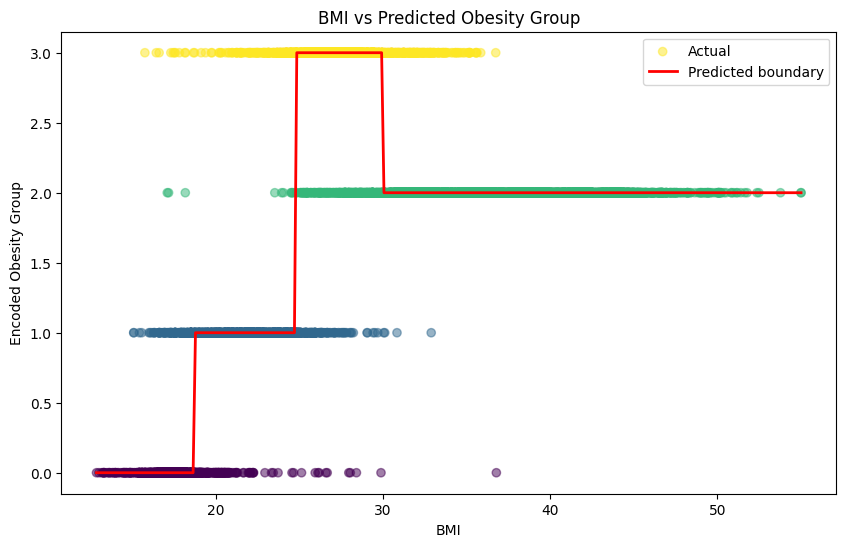

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sort values for smooth prediction curve
X_plot = np.linspace(X['BMI'].min(), X['BMI'].max(), 300).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.figure(figsize=(10,6))
plt.scatter(X['BMI'], y_encoded, c=y_encoded, cmap='viridis', alpha=0.5, label='Actual')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Predicted boundary')
plt.xlabel('BMI')
plt.ylabel('Encoded Obesity Group')
plt.title('BMI vs Predicted Obesity Group')
plt.legend()
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Encode Gender
df['Gender_encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})  # adjust if 'M'/'F'

# Feature set
X = df[['BMI', 'Gender_encoded']]
y = df['Obesity_Group']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [17]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

In [18]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.89      0.90       374
      Normal_Weight       0.80      0.88      0.84       469
              Obese       0.97      0.95      0.96      1519
         Overweight       0.86      0.86      0.86       745

           accuracy                           0.91      3107
          macro avg       0.89      0.90      0.89      3107
       weighted avg       0.91      0.91      0.91      3107



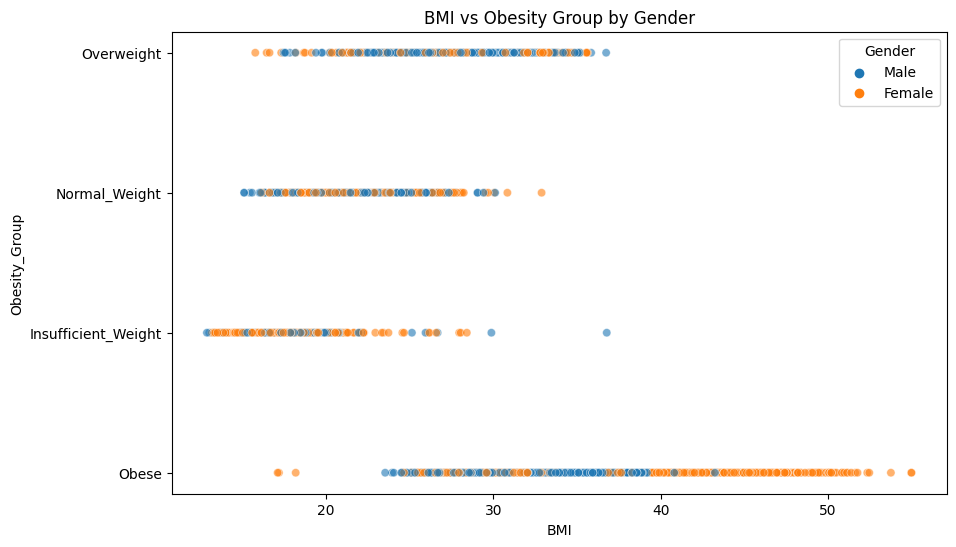

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='BMI',
    y='Obesity_Group',
    hue='Gender',
    data=df,
    alpha=0.6
)
plt.title('BMI vs Obesity Group by Gender')
plt.show()
